In [12]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
import os
from onix.data_tools import get_experiment_data, open_analysis_folder, get_analysis_file_path
from onix.helpers import data_identifier, console_bold, present_float

In [2]:
name = "Antihole EO"
analysis_number = None
identifier = None

In [3]:
def add_label(ax, x=0.02, y=1.1):
    ax.text(x, y, identifier, transform=ax.transAxes)

In [193]:
data_numbers = [177]
data, headers = get_experiment_data(data_numbers[0])
identifier = "data " + data_identifier(data_numbers) + ", analysis " + data_identifier([analysis_number])

In [148]:
if input(f"Create new analysis folder? (y/{console_bold('n')}) ") == "y":
    analysis_number = open_analysis_folder(name)
else:
    if input(f"Keep current analysis number of {analysis_number}? ({console_bold('y')}/n) ") == "n":
        analysis_number = int(input("Enter analysis number: "))
identifier = "data " + data_identifier(data_numbers) + ", analysis " + data_identifier([analysis_number])
print(f"Current analysis number is {analysis_number}")

Create new analysis folder? (y/n)  n
Keep current analysis number of 137? (y/n)  y


Current analysis number is 137


In [185]:
probe_detunings = headers["params"]["probe_detunings"].to("MHz").magnitude
probe_start_times = np.arange(len(probe_detunings)) * (headers["params"]["probe_on_time"] + headers["params"]["probe_off_time"]) + headers["params"]["ttl_probe_offset_time"]
probe_end_times = probe_start_times + headers["params"]["probe_off_time"]
probe_start_times = probe_start_times.to("s").magnitude + 5e-6
probe_end_times = probe_end_times.to("s").magnitude + 4e-6

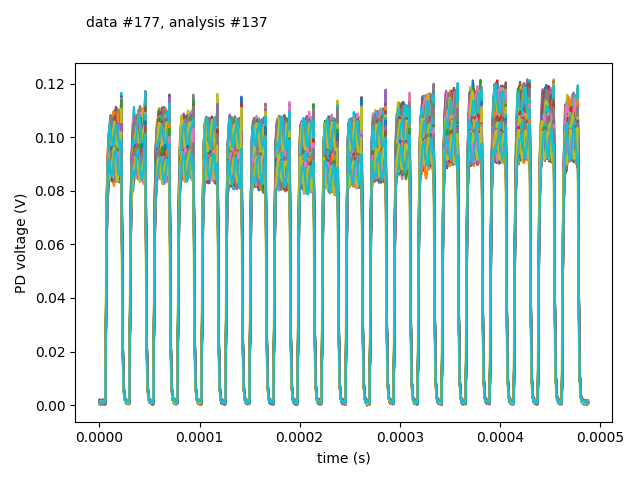

In [186]:
fig, ax = plt.subplots()
add_label(ax)
ax.plot(data["photodiode_times"], np.transpose(data["photodiode_voltages"]))
#ax.vlines(probe_start_times, 0, 0.08, color="k")
#ax.vlines(probe_end_times, 0, 0.08, color="k")
ax.set_xlabel("time (s)")
ax.set_ylabel("PD voltage (V)")
plt.tight_layout()
plt.savefig(get_analysis_file_path(analysis_number, str(analysis_number) + "all_data.pdf"))
plt.show()

In [187]:
voltages = {
    "initial": [],
    "post_burn": [],
    "post_pump": [],
}
voltages_err = {
    "initial": [],
    "post_burn": [],
    "post_pump": [],
}
for ll in range(3):
    if ll == 0:
        label = "initial"
    elif ll == 1:
        label = "post_burn"
    elif ll == 2:
        label = "post_pump"
    for mm in range(headers["params"]["probe_repeats"]):
        run = []
        run_err = []
        index = ll * headers["params"]["probe_repeats"] + mm
        for kk in range(len(probe_detunings)):
            start = probe_start_times[kk]
            end = probe_end_times[kk]
            mask = np.bitwise_and(data["photodiode_times"] > start, data["photodiode_times"] <= end)
            avg = np.average(data["photodiode_voltages"][index][mask])
            try:
                ste = np.std(data["photodiode_voltages"][index][mask]) / np.sqrt(len(data["photodiode_voltages"][index][mask] - 1))
            except ZeroDivisionError:
                ste = np.nan
            run.append(avg)
            run_err.append(ste)
        voltages[label].append(run)
        voltages_err[label].append(run_err)


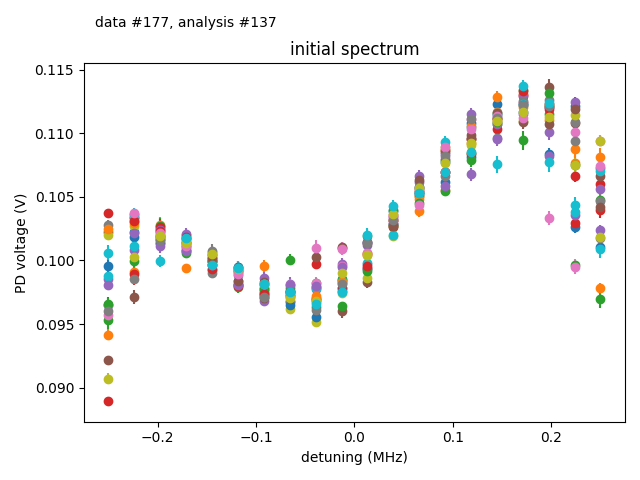

In [188]:
fig, ax = plt.subplots()
add_label(ax)
label = "initial"
for kk in range(headers["params"]["probe_repeats"]):
    ax.errorbar(probe_detunings, voltages[label][kk], voltages_err[label][kk], fmt="o", ls="none")
ax.set_xlabel("detuning (MHz)")
ax.set_ylabel("PD voltage (V)")
ax.set_title(f"{label} spectrum")
plt.tight_layout()
plt.savefig(get_analysis_file_path(analysis_number, str(analysis_number) + f"{label}.pdf"))
plt.show()

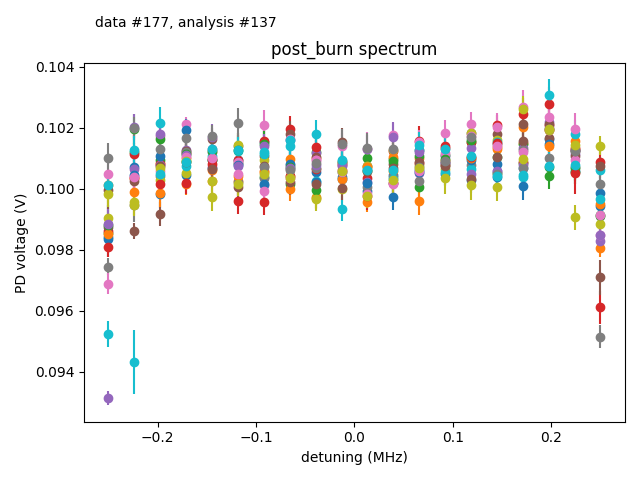

In [189]:
fig, ax = plt.subplots()
add_label(ax)
label = "post_burn"
for kk in range(headers["params"]["probe_repeats"]):
    ax.errorbar(probe_detunings, voltages[label][kk], voltages_err[label][kk], fmt="o", ls="none")
ax.set_xlabel("detuning (MHz)")
ax.set_ylabel("PD voltage (V)")
ax.set_title(f"{label} spectrum")
plt.tight_layout()
plt.savefig(get_analysis_file_path(analysis_number, str(analysis_number) + f"{label}.pdf"))
plt.show()

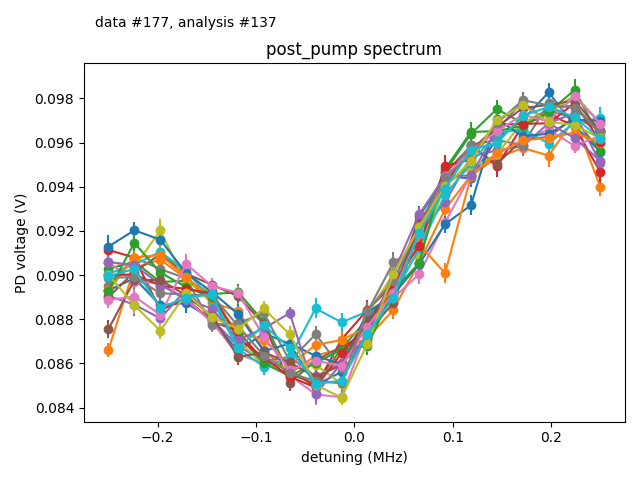

In [190]:
fig, ax = plt.subplots()
add_label(ax)
label = "post_pump"
for kk in range(headers["params"]["probe_repeats"]):
    ax.errorbar(probe_detunings, voltages[label][kk], voltages_err[label][kk], fmt="o", ls="-")
ax.set_xlabel("detuning (MHz)")
ax.set_ylabel("PD voltage (V)")
ax.set_title(f"{label} spectrum")
plt.tight_layout()
plt.savefig(get_analysis_file_path(analysis_number, str(analysis_number) + f"{label}.pdf"))
plt.show()

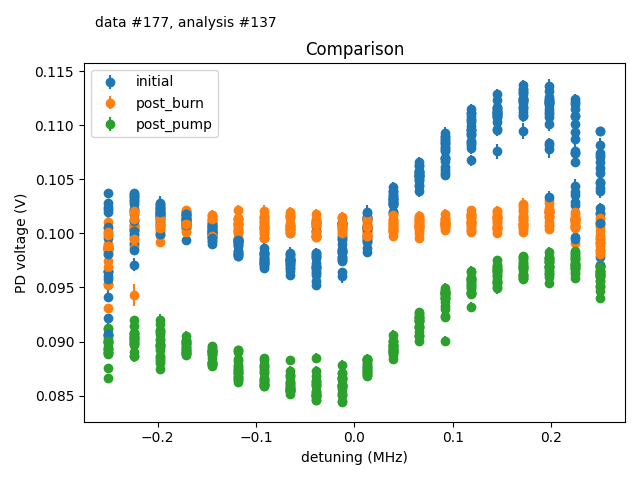

In [191]:
fig, ax = plt.subplots()
add_label(ax)
label = "initial"
for kk in range(headers["params"]["probe_repeats"]):
    if kk == 0:
        ax.errorbar(probe_detunings, voltages["initial"][kk], voltages_err["initial"][kk], fmt="o", ls="none", color="C0", label="initial")
        ax.errorbar(probe_detunings, voltages["post_burn"][kk], voltages_err["post_burn"][kk], fmt="o", ls="none", color="C1", label="post_burn")
        ax.errorbar(probe_detunings, voltages["post_pump"][kk], voltages_err["post_pump"][kk], fmt="o", ls="none", color="C2", label="post_pump")
    else:
        ax.errorbar(probe_detunings, voltages["initial"][kk], voltages_err["initial"][kk], fmt="o", ls="none", color="C0")
        ax.errorbar(probe_detunings, voltages["post_burn"][kk], voltages_err["post_burn"][kk], fmt="o", ls="none", color="C1")
        ax.errorbar(probe_detunings, voltages["post_pump"][kk], voltages_err["post_pump"][kk], fmt="o", ls="none", color="C2")
ax.set_xlabel("detuning (MHz)")
ax.set_ylabel("PD voltage (V)")
ax.legend()
ax.set_title("Comparison")
plt.tight_layout()
plt.savefig(get_analysis_file_path(analysis_number, str(analysis_number) + "comparison.pdf"))
plt.show()

In [192]:
together[data_numbers[0]] = np.average((np.array(voltages["post_pump"]) - voltages["post_burn"]), axis=0) / np.average(voltages["post_burn"], axis=0)

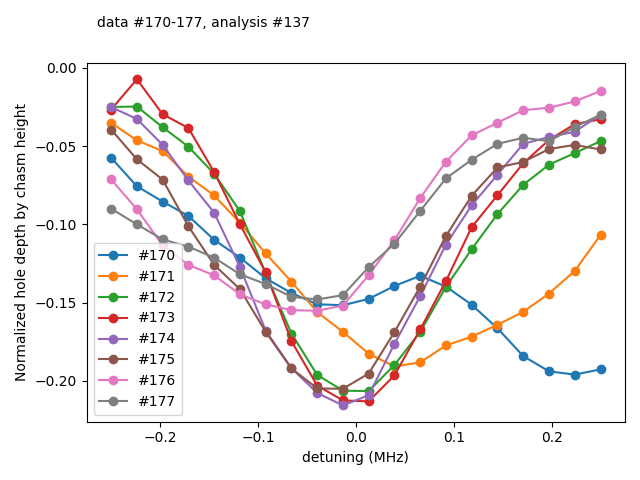

In [198]:
fig, ax = plt.subplots()
add_label(ax)
label = "initial"
for kk in together:
    ax.plot(probe_detunings, together[kk], label="#" + str(kk), marker="o")
ax.set_xlabel("detuning (MHz)")
ax.set_ylabel("Normalized hole depth by chasm height")
ax.legend()
plt.tight_layout()
plt.savefig(get_analysis_file_path(analysis_number, str(analysis_number) + "vary_c_state_energy.pdf"))
plt.show()